# Exploring kaggle dataset: 120 years of Olympic history: athletes and results
***containing:*** bio data on athletes and medal results from Athens 1896 to Rio 2016

## Contents of notebook:
- [ ] insert links here

***Ideas/thoughts to investigate:***
- [ ] Russian medal winning over time (in light of doping scandals)
- [ ] Medal winners per capita
- [ ] Medal winners normalised for: total entrants; population; GDP; etc.
    * will have to look at year on year GDP of countries
- [ ] Separate consideration on summer and winter olympics
- [ ] review the variation of sports in the olympics, make this consistent

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# increase width of cells in notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (8,4)

## Parsing .csv's to dataframes, and previewing

In [5]:
events_df = pd.read_csv('./data/athlete_events.csv')
regions_df = pd.read_csv('./data/noc_regions.csv')

In [6]:
print(events_df.shape)
events_df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
events_df.info()

# result: missing values for: height, weight, age and medals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
events_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
print(regions_df.shape)
regions_df.head()

# result: this maps NOC code to a region, with notes

(230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


### Merging events_df and regions_df

In [11]:
print(events_df.columns)
print(regions_df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
Index(['NOC', 'region', 'notes'], dtype='object')


In [12]:
merged_df = events_df.merge(regions_df, on='NOC', how='outer')

In [13]:
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


## Reviewing missing data in the dataset
* data missing for:
    * height
    * weight
    * medals
    
To start, let's check the years where there exists missing data

In [14]:
# height
merged_df[merged_df['Height'].isnull()]['Year'].unique()

array([1936., 1948., 1980., 1984., 1992., 2008., 1988., 1932., 1994.,
       1998., 1996., 2002., 1952., 1920., 1900., 1908., 1928., 1912.,
       1956., 1906., 1924., 1960., 1896., 2014., 1972., 1976., 1964.,
       1904., 2016., 2000., 2004., 1968., 2012., 2006., 2010.,   nan])

In [15]:
# weight 
merged_df[merged_df['Weight'].isnull()]['Year'].unique()

array([1980., 1984., 1936., 2002., 1948., 1992., 2008., 1988., 1932.,
       1994., 1998., 1996., 1952., 1920., 1900., 1908., 1928., 1912.,
       1956., 1906., 1924., 1972., 2012., 2014., 1960., 1896., 1976.,
       1964., 1904., 2016., 2006., 2000., 2004., 1968., 2010.,   nan])

In [16]:
# medals
merged_df[merged_df['Medal'].isnull()]['Year'].unique()

array([1992., 2012., 2000., 2004., 2016., 2006., 1998., 2008., 1996.,
       2014., 1984., 1936., 1980., 1988., 2010., 2002., 1948., 1994.,
       1932., 1952., 1920., 1908., 1972., 1928., 1956., 1912., 1960.,
       1924., 1964., 1976., 1968., 1906., 1900., 1896., 1904.,   nan])

### Is it possible to calculate how many medals should have been awarded at each olympics, given the Events list?
(Doing this will allow us to guage how much of the medal data is missing.)

***summary of findings:***
* cannot simply take Events and multiply by 3 to get total medals
* there are team sports where the no. of medals is >3

In [17]:
# checking the events held per year, could use this as an indicator for how many medals SHOULD have been awarded
events_group = merged_df.groupby('Year')['Event'].unique()
events_group.head()

Year
1896.0    [Weightlifting Men's Unlimited, One Hand, Weig...
1900.0    [Tug-Of-War Men's Tug-Of-War, Fencing Men's Fo...
1904.0    [Rowing Men's Coxed Eights, Golf Men's Individ...
1906.0    [Football Men's Football, Gymnastics Men's Tea...
1908.0    [Athletics Men's Hammer Throw, Wrestling Men's...
Name: Event, dtype: object

In [18]:
# assuming bronze, silver and gold is awarded for every event
num_of_events = {}
for ix, events in enumerate(events_group.values, 0):
    # multiply by 3 for bronze, silver, gold
    year = events_group.index[ix]
    num_of_events[year] = len(events) * 3
print(num_of_events)

{1896.0: 129, 1900.0: 270, 1904.0: 285, 1906.0: 222, 1908.0: 327, 1912.0: 321, 1920.0: 474, 1924.0: 444, 1928.0: 408, 1932.0: 435, 1936.0: 501, 1948.0: 525, 1952.0: 513, 1956.0: 525, 1960.0: 531, 1964.0: 591, 1968.0: 621, 1972.0: 684, 1976.0: 705, 1980.0: 723, 1984.0: 780, 1988.0: 849, 1992.0: 942, 1994.0: 183, 1996.0: 813, 1998.0: 204, 2000.0: 900, 2002.0: 234, 2004.0: 903, 2006.0: 252, 2008.0: 906, 2010.0: 258, 2012.0: 906, 2014.0: 294, 2016.0: 918}


In [19]:
# medals

merged_df.groupby('Year')['Medal'].value_counts(dropna=False)

# result: NaN's mean no medal OR maybe missing data, and there isn't an even award of gold, silver, bronze
# uneven award of medals may be down to ties?

Year    Medal 
1896.0  NaN         237
        Gold         62
        Silver       43
        Bronze       38
1900.0  NaN        1332
        Silver      228
        Gold        201
        Bronze      175
1904.0  NaN         815
        Gold        173
        Silver      163
        Bronze      150
1906.0  NaN        1275
        Gold        157
        Silver      156
        Bronze      145
1908.0  NaN        2270
        Gold        294
        Silver      281
        Bronze      256
1912.0  NaN        3099
        Gold        326
        Silver      315
        Bronze      300
1920.0  NaN        2984
        Gold        493
        Silver      448
        Bronze      367
1924.0  NaN        4731
        Gold        332
                  ...  
2002.0  Bronze      159
        Silver      157
2004.0  NaN       11442
        Bronze      677
        Gold        664
        Silver      660
2006.0  NaN        3856
        Gold        176
        Bronze      175
        Silver      175
2

In [20]:
# checking events
events_group.iloc[-1]

# result: no trivial way of estimating how many medals are should have been awarded given Events
# this is because some events are team events, wherein many medals are awarded to whole teams

array(["Swimming Women's 200 metres Freestyle",
       "Swimming Women's 4 x 200 metres Freestyle Relay",
       "Triathlon Men's Olympic Distance",
       "Rhythmic Gymnastics Women's Group",
       "Wrestling Men's Light-Heavyweight, Freestyle",
       "Athletics Women's Shot Put", "Athletics Men's 20 kilometres Walk",
       "Archery Women's Individual", "Archery Women's Team",
       "Athletics Men's Triple Jump",
       "Shooting Men's Air Rifle, 10 metres",
       "Shooting Men's Small-Bore Rifle, Prone, 50 metres",
       "Diving Men's Springboard",
       "Diving Men's Synchronized Springboard",
       "Swimming Women's 400 metres Freestyle",
       "Modern Pentathlon Men's Individual", "Badminton Men's Doubles",
       "Diving Men's Platform", "Diving Men's Synchronized Platform",
       "Shooting Women's Trap", "Fencing Men's Foil, Individual",
       "Fencing Men's Foil, Team",
       "Swimming Women's 200 metres Backstroke",
       "Weightlifting Men's Featherweight", "Badm

### Visualising medal data:

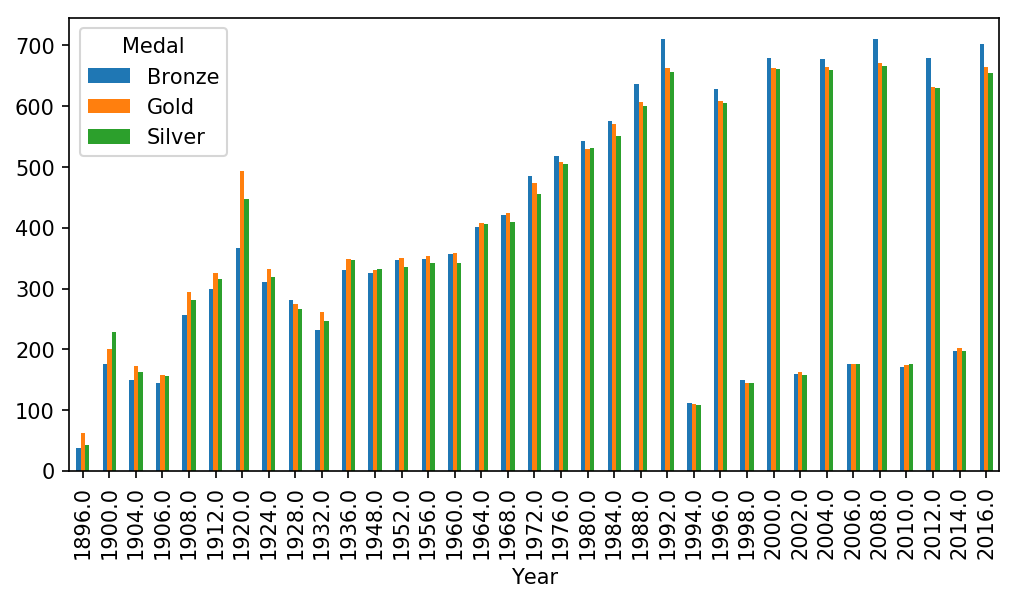

In [39]:
merged_df.groupby('Year')['Medal'].value_counts().unstack().plot(kind='bar')

# result: following 1992 the winter and summer olympics are held on different years

### what is the age distribution of medalists and how does this compare to the age distribution of all athletes?

25.556898357297374
weighted avg age of all atheletes: 25.556898357297374


Text(0,0.5,'Count')

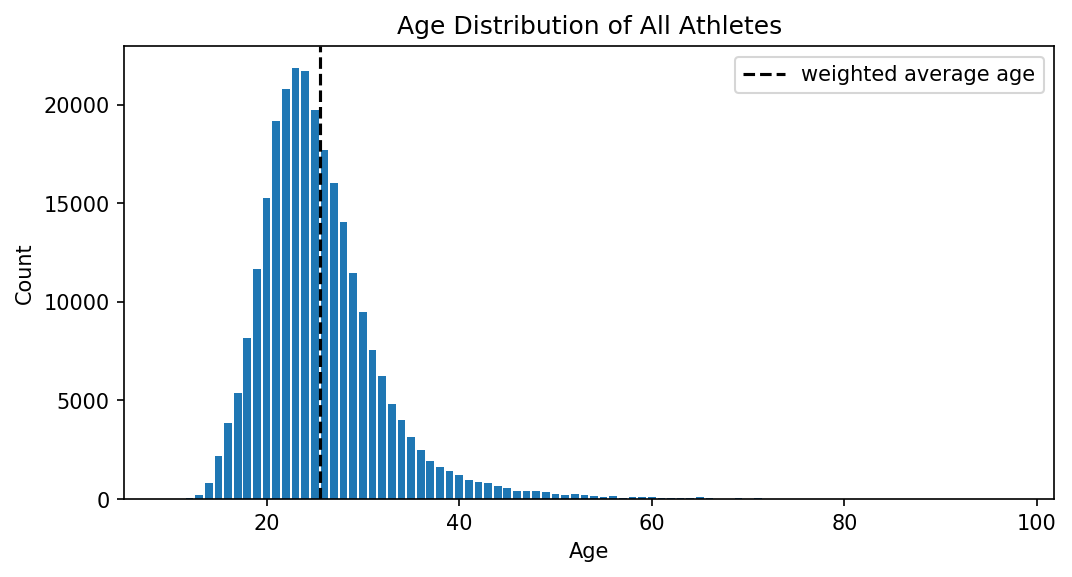

In [29]:
# age distribution of all athletes
all_age = merged_df[(merged_df['Age'].notnull())]['Age'].value_counts()

# weighted average
avg_age_all = np.average(all_age.index, weights=all_age.values)

print(avg_age_all)

print('weighted avg age of all atheletes:', avg_age_all)

# plotting
plt.bar(all_age.index, all_age.values)
plt.title('Age Distribution of All Athletes')
plt.xlabel('Age')
plt.axvline(x=avg_age_all, color='k', linestyle='--', label='weighted average age')
plt.legend()
plt.ylabel('Count')

weighted avg age of all medalists: 25.925174771452717
weighted avg age of gold: 25.901013309134907
weight avg age of silver: 25.99672412448327
weight avg age of bronze: 25.879209595571275


Text(0,0.5,'Count')

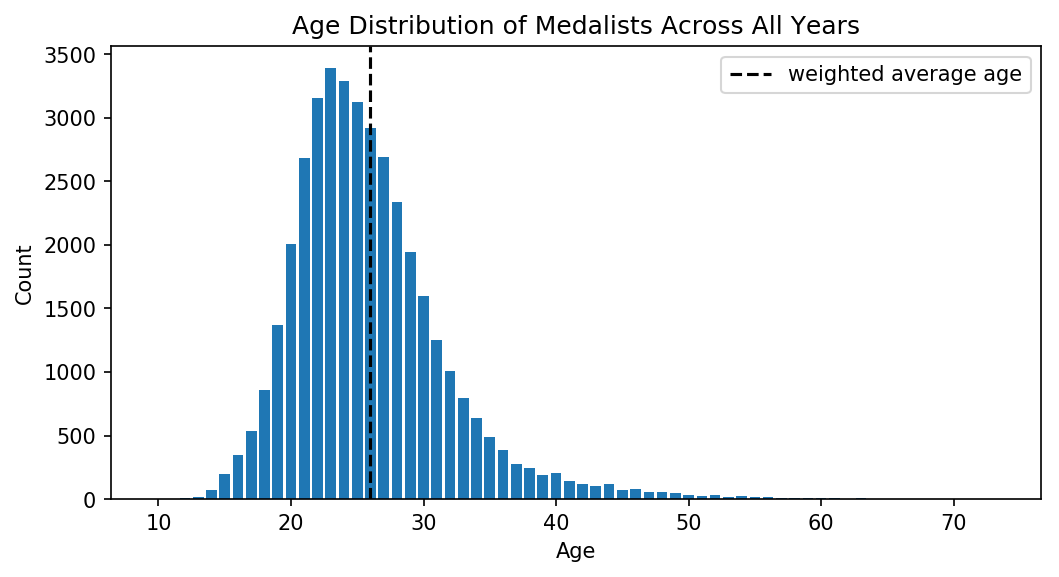

In [30]:
# age of medalists, for all years
medalists_all = merged_df[(merged_df['Medal'].notnull()) & (merged_df['Age'].notnull())]
# gold
medalists_gold = medalists_all[(medalists_all['Medal']=='Gold')]
# silver
medalists_silver = medalists_all[(medalists_all['Medal']=='Silver')]
# bronze
medalists_bronze = medalists_all[(medalists_all['Medal']=='Bronze')]


medalists_all_age = medalists_all['Age'].value_counts()
medalists_gold_age = medalists_gold['Age'].value_counts()
medalists_silver_age = medalists_silver['Age'].value_counts()
medalists_bronze_age = medalists_bronze['Age'].value_counts()

# weighted average
avg_age_all = np.average(medalists_all_age.index, weights=medalists_all_age.values)
avg_age_gold = np.average(medalists_gold_age.index, weights=medalists_gold_age.values)
avg_age_silver = np.average(medalists_silver_age.index, weights=medalists_silver_age.values)
avg_age_bronze = np.average(medalists_bronze_age.index, weights=medalists_bronze_age.values)

print('weighted avg age of all medalists:', avg_age_all)
print('weighted avg age of gold:', avg_age_gold)
print('weight avg age of silver:', avg_age_silver)
print('weight avg age of bronze:', avg_age_bronze)

# plotting
plt.bar(medalists_all_age.index, medalists_all_age.values)
# plt.bar(medalists_gold_age.index, medalists_gold_age.values, label='gold', alpha=0.5)
# plt.bar(medalists_silver_age.index, medalists_silver_age.values, label='silver', alpha=0.5)
# plt.bar(medalists_bronze_age.index, medalists_bronze_age.values, label='bronze', alpha=0.5)
plt.title('Age Distribution of Medalists Across All Years')
plt.xlabel('Age')
plt.axvline(x=avg_age_all, color='k', linestyle='--', label='weighted average age')
plt.legend()
plt.ylabel('Count')

In [40]:
merged_df['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

Text(0,0.5,'Count')

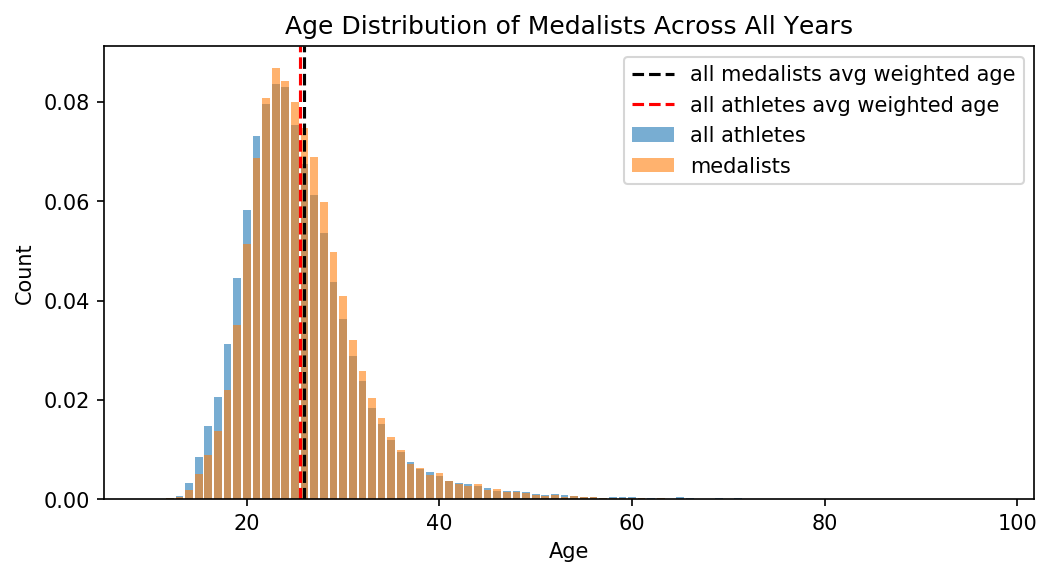

In [42]:
# normalising and overlaying age distributions

all_age = merged_df[(merged_df['Age'].notnull())]['Age'].value_counts(normalize=True)
medalists_all_age = medalists_all['Age'].value_counts(normalize=True)

plt.bar(all_age.index, all_age.values, label='all athletes', alpha=0.6)
plt.bar(medalists_all_age.index, medalists_all_age.values, label='medalists', alpha=0.6)


avg_age_medalists = np.average(medalists_all_age.index, weights=medalists_all_age.values)
avg_age_all = np.average(all_age.index, weights=all_age.values)

plt.title('Age Distribution of Medalists Across All Years')
plt.xlabel('Age')
plt.axvline(x=avg_age_medalists, color='k', linestyle='--', label='all medalists avg weighted age')
plt.axvline(x=avg_age_all, color='r', linestyle='--', label='all athletes avg weighted age')
plt.legend()
plt.ylabel('Count')

# result, medalists are actually marginally older, but no significant difference. will need to explore this further per year.

### exploring missing values for height and weight

In [ ]:
# height
merged_df.groupby(['Year'])